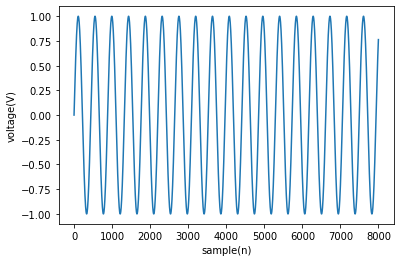

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

Fs = 44100
f = 100
sample = 8000
x = np.arange(sample)
y = np.sin(2 * np.pi * f * x / Fs)
plt.plot(x, y)
plt.xlabel('sample(n)')
plt.ylabel('voltage(V)')
plt.show()


In [2]:

def print_wave_file(sample_rate, normalized_data, wave_name):
    time_space = np.linspace(0, len(normalized_data)/sample_rate, num=len(normalized_data))
    plt.figure()
    plt.title("wave " + wave_name)
    plt.xlabel("time (seconds)")
    plt.ylabel("amplitude[" + str(math.floor(normalized_data.min())) + ":" + str(math.ceil(normalized_data.max())) +"] (data)")
    plt.yticks(np.arange(math.floor(normalized_data.min()), math.ceil(normalized_data.max()), 0.1))
    plt.plot(time_space, normalized_data)
    plt.show()

In [3]:
def create_sine(hz, sample_rate, durotian):
    samples = np.arange(sample_rate * durotian) / sample_rate
    return  np.sin(2 * np.pi * hz * samples)

In [4]:
def to_wave(signal, frame_rate, name):
    signal = signal * 32767
    signal = np.int16(signal)
    wavfile.write(name + ".wav", frame_rate, signal)

In [68]:
sine = create_sine(8800, 44100, 5)

In [6]:
to_wave(sine, 44100, "sine")


NameError: name 'wavfile' is not defined

In [0]:
print_wave_file(44100, sine, "sine")

In [0]:
from tqdm import tqdm

def count_fft(data):
    spectra = []
    for i in tqdm(range(0, int((len(data) - frame_width) / spacing))):
        frame = (data[i*spacing:i*spacing+frame_width]) * hamming
        spectra.append(fft(frame))
    return spectra

In [0]:
import numpy as np
from obspy.core import read
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft, fftshift
%matplotlib inline
from scipy import signal
t1 = np.linspace(-1, 1, 2 * 100, endpoint=False)
sig1 = signal.gausspulse(t1, fc=5)
plt.figure(figsize=(10,8))
plt.plot(t1, sig1, 'r')
plt.show()


In [0]:
def nextpow2(i):
    '''
    Find the next power 2 number for FFT
    '''

    n = 1
    while n < i: n *= 2
    return n


def shift_signal_in_frequency_domain(datin, shift):
    '''
    This is function to shift a signal in frequency domain. 
    The idea is in the frequency domain, 
    we just multiply the signal with the phase shift. 
    '''
    Nin = len(datin) 

    # get the next power 2 number for fft
    N = nextpow2(Nin +np.max(np.abs(shift)))

    # do the fft
    fdatin = np.fft.fft(datin, N)

    # get the phase shift, shift here is D in the above explanation
    ik = np.array([2j*np.pi*k for k in range(0, N)]) / N 
    fshift = np.exp(-ik*shift)

    # multiple the signal with shift and transform it back to time domain
    datout = np.real(np.fft.ifft(fshift * fdatin))

    # only get the data have the same length as the input signal
    datout = datout[0:Nin]

    return datout

# This is the amount we will move
nShift = 50

# generate the 2nd signal
sig2 = shift_signal_in_frequency_domain(sig1, nShift)

# plot two signals together
plt.figure(figsize=(10,8))
plt.plot(sig1, 'r', label = 'signal 1')
plt.plot(sig2, 'b', label = 'signal 2')
plt.legend()
plt.show()

In [0]:
#Frequency domain cross correlation
def cross_correlation_using_fft(x, y):
    f1 = fft(x)
    
    # flip the signal of y
    f2 = fft(np.flipud(y))
    cc = np.real(ifft(f1 * f2))

    return fftshift(cc)
 
# shift &lt; 0 means that y starts 'shift' time steps before x 
# shift &gt; 0 means that y starts 'shift' time steps after x
def compute_shift(x, y):
    # we make sure the length of the two signals are the same
    assert len(x) == len(y)
    c = cross_correlation_using_fft(x, y)
    assert len(c) == len(x)
    zero_index = int(len(x) / 2) - 1
    shift = zero_index - np.argmax(c)
    return shift

In [0]:
calculate_shift = compute_shift(sig1, sig2)
print('The shift we get from cross correlation is %d, the true shift should be 50'%calculate_shift)

In [16]:
from scipy.fftpack import fft, ifft
sine_fft = fft(sine)

In [17]:
sine_fft

array([-7.16116536e-12+0.00000000e+00j, -2.67177729e-12-1.11398211e-11j,
       -5.16259299e-12-1.08150790e-11j, ...,
        4.83359551e-12+4.11586920e-12j, -5.16259299e-12+1.08150790e-11j,
       -2.67177729e-12+1.11398211e-11j])

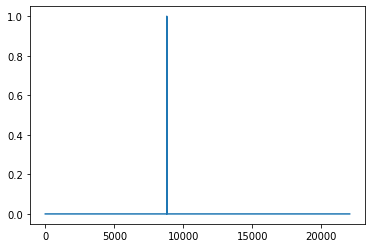

In [69]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Number of samplepoints
N = len(sine)
# sample spacing
T = 1.0 / 44100.0
x = np.linspace(0.0, N*T, N)
y = sine
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()

In [70]:
print(np.argmax(yf), len(yf))

63118 220500
